# **Assignment : Anime Recommended System**

- 62010278 ณัฐพนธ์ สุขถาวร 
- 62010497 นิธิ น้อมประวัติ 
- 62010609 พักตร์ภูมิ ตาแพร่ 
- 62010948 สิรวิชญ์ สุขวัฒนาวิทย์ 

## **Import Libraries**

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Global Config**

In [101]:
sns.set_theme(style="whitegrid", palette="pastel")


class CONFIG:
    PLT_FIG_SIZE = plt.figaspect(8/19)


# color codes for python build-in print function
class PRINT_COLOR_CODE:
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    GREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC = '\033[0m'


## **Define Util Functions**

In [102]:
# function to return list of columns which contained Nan value
def get_cols_contained_na(df):
    masked_na_df = df.isna()
    cols_with_na = df.columns[masked_na_df.any()].tolist()
    return cols_with_na


## **Import Datasets**

In [103]:
ANIME_CSV_PATH = "./datasets/anime.csv"
RATING_CSV_PATH = "./datasets/rating.csv"


In [104]:
anime_df = pd.read_csv(ANIME_CSV_PATH)
anime_df.rename(columns={'rating': 'average_rating'}, inplace=True)

rating_df = pd.read_csv(RATING_CSV_PATH)
rating_df.rename(columns={'rating': 'user_rating'}, inplace=True)

rating_merged_df = rating_df.merge(anime_df, on='anime_id', how='inner')

# NOTE : Careful of big file size
# rating_merged_df.to_csv('./dataExplores/rating_merged_anime.csv', index=False,  encoding='utf-8')


## **Data Exploration (1)**

### 1. **Anime Dataframe** Basic Info.

In [105]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(anime_df)}{PRINT_COLOR_CODE.ENDC}')

anime_df



List of columns that contain NaN values : ['genre', 'type', 'average_rating']


,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


,anime_id,average_rating,members
count,12294.0,12064.0,12294.0
mean,14058.2,6.5,18071.3
std,11455.3,1.0,54820.7
min,1.0,1.7,5.0
25%,3484.2,5.9,225.0
50%,10260.5,6.6,1550.0
75%,24794.5,7.2,9437.0
max,34527.0,10.0,1013917.0


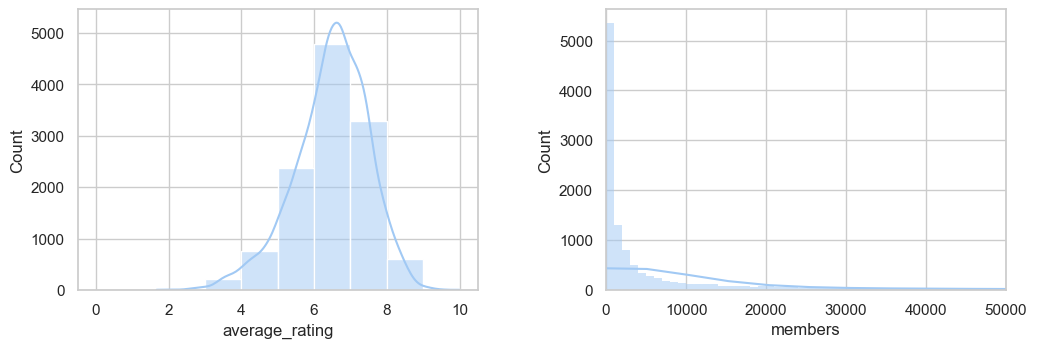

In [106]:
fig, axs = plt.subplots(ncols=2, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(anime_df, x='average_rating', kde=True, binwidth=1, binrange=[0, 10], ax=axs[0])

sns.histplot(anime_df, x='members', kde=True, binwidth=1e3, ax=axs[1])
axs[1].set(xlim=(0, 0.05e6))

anime_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))


### 2. **Rating Dataframe** Basic info.

In [107]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_df)}{PRINT_COLOR_CODE.ENDC}')

rating_df


List of columns that contain NaN values : []


,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


,user_id,anime_id,user_rating
count,7813737.0,7813737.0,7813737.0
mean,36728.0,8909.1,6.1
std,20997.9,8883.9,3.7
min,1.0,1.0,-1.0
25%,18974.0,1240.0,6.0
50%,36791.0,6213.0,7.0
75%,54757.0,14093.0,9.0
max,73516.0,34519.0,10.0


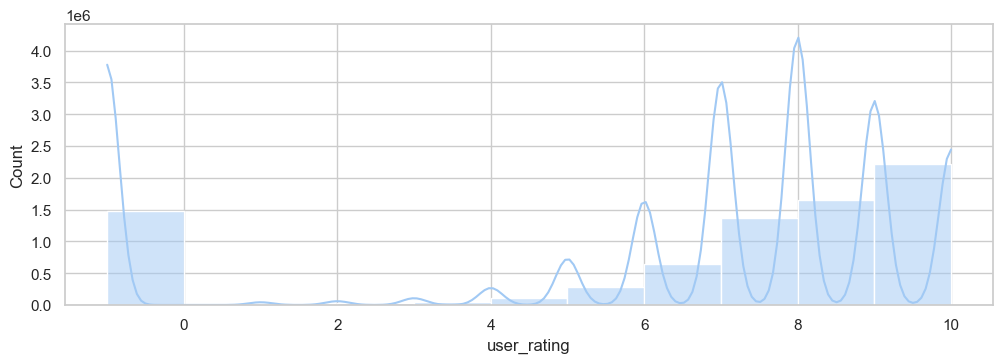

In [108]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(rating_df, x='user_rating', kde=True, binwidth=1, binrange=[-1, 10], ax=axs)

rating_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

### 3. **Rating Merged Dataframe** Basic info.

In [109]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_merged_df)}{PRINT_COLOR_CODE.ENDC}')

rating_merged_df.sort_values(by=['user_id', 'anime_id'])



List of columns that contain NaN values : ['genre', 'type', 'average_rating']


,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
25925,1,24,-1,School Rumble,"Comedy, Romance, School, Shounen",TV,26,8.06,178553
33078,1,79,-1,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772
40190,1,226,-1,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
67696,1,241,-1,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395
...,...,...,...,...,...,...,...,...,...
1474883,73515,16512,7,Devil Survivor 2 The Animation,"Action, Demons, Supernatural",TV,13,7.06,101266
6640957,73515,17187,9,Ghost in the Shell: Arise - Border:1 Ghost Pain,"Mecha, Police, Psychological, Sci-Fi",Movie,1,7.64,31747
4153140,73515,22145,10,Kuroshitsuji: Book of Circus,"Comedy, Demons, Fantasy, Historical, Shounen, ...",TV,10,8.37,122895
4055601,73516,790,9,Ergo Proxy,"Mystery, Psychological, Sci-Fi",TV,23,8.03,265005


In [110]:
rating_merged_df.groupby(by='type').count().sort_values(by='user_id', ascending=False).rename(columns={'user_id': 'count'})[['count']]


,count
type,
TV,5283596
Movie,1051998
OVA,800307
Special,559366
ONA,91956
Music,26500


,user_id,rated_anime_count
count,73515.0,73515.0
mean,36758.4,106.3
std,21222.5,153.1
min,1.0,1.0
25%,18379.5,18.0
50%,36758.0,57.0
75%,55137.5,136.0
max,73516.0,10226.0


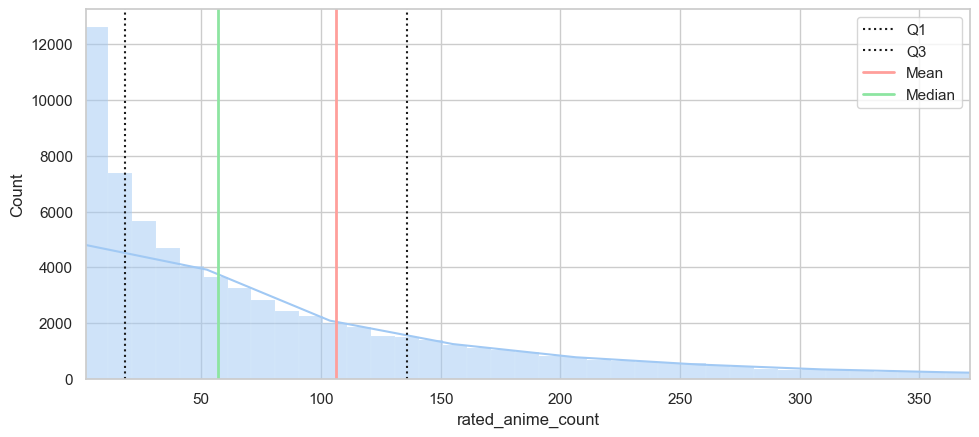

In [111]:
count_rated_by_user_df = rating_merged_df.groupby(['user_id'])[['anime_id']].count().sort_values(by='anime_id').rename(columns={'anime_id': 'rated_anime_count'}).reset_index()

fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)

sns.histplot(count_rated_by_user_df, x='rated_anime_count', binwidth=10,  kde=True, ax=axs)
axs.set(xlim=(count_rated_by_user_df['rated_anime_count'].quantile(0.05), count_rated_by_user_df['rated_anime_count'].quantile(0.95)))
axs.axvline(count_rated_by_user_df['rated_anime_count'].quantile(0.25), color='k', linestyle='dotted', linewidth=1.5, label='Q1')
axs.axvline(count_rated_by_user_df['rated_anime_count'].quantile(0.75), color='k', linestyle='dotted', linewidth=1.5, label='Q3')
axs.axvline(count_rated_by_user_df['rated_anime_count'].mean(), color='r', linestyle='-', linewidth=2, label='Mean')
axs.axvline(count_rated_by_user_df['rated_anime_count'].median(), color='g', linestyle='-', linewidth=2, label='Median')
axs.legend()

count_rated_by_user_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

## **Data Cleansing (1)**

In Anime DataFrame, drop all anime types except `TV`, `Movie`, `OVA`, `Special`, `ONA`, `Music`

In [112]:
type_except_list = ["TV", 'Movie', "OVA", "Special", "ONA", "Music"] # FIXME : TUNING ME!!!

print(f"{PRINT_COLOR_CODE.FAIL}drop all anime types except {PRINT_COLOR_CODE.GREEN}{type_except_list}{PRINT_COLOR_CODE.ENDC}")

new_anime_df = anime_df[anime_df['type'].isin(type_except_list)]

drop_count = len(anime_df)-len(new_anime_df)
drop_percentage = (drop_count/len(anime_df))*100

print(f"{PRINT_COLOR_CODE.FAIL}drop {PRINT_COLOR_CODE.WARNING}{drop_count}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}rows{PRINT_COLOR_CODE.ENDC} ({drop_percentage:.4f}%)")

anime_df = new_anime_df

anime_df.reset_index(drop=True, inplace=True)
anime_df


drop all anime types except ['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music']
drop 25 rows (0.2034%)


,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12264,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12265,5543,Under World,Hentai,OVA,1,4.28,183
12266,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12267,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In Anime DataFrame, drop less than `{{min_n_members_threshold}}` members anime

In [113]:
min_n_members_threshold = 225  # FIXME : TUNING ME!!!

print(f"{PRINT_COLOR_CODE.FAIL}drop less than {PRINT_COLOR_CODE.WARNING}{min_n_members_threshold}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}members anime{PRINT_COLOR_CODE.ENDC}")

new_anime_df = anime_df[anime_df['members'] >= min_n_members_threshold]

drop_count = len(anime_df)-len(new_anime_df)
drop_percentage = (drop_count/len(anime_df))*100

print(f"{PRINT_COLOR_CODE.FAIL}drop {PRINT_COLOR_CODE.WARNING}{drop_count}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}rows{PRINT_COLOR_CODE.ENDC} ({drop_percentage:.4f}%)")

anime_df = new_anime_df

anime_df.reset_index(drop=True, inplace=True)
anime_df


drop less than 225 members anime
drop 3068 rows (25.0061%)


,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
9196,7914,Kyuukyoku no Chef wa Oishinbo Papa,Hentai,OVA,1,5.43,262
9197,5559,Nijuusou: Wana ni Ochita Onna-tachi,Hentai,OVA,1,5.20,240
9198,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
9199,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240


join (inner) Rating Dataframe with Anime Dataframe `again`

In [114]:
rating_merged_df = rating_df.merge(anime_df, on='anime_id', how='inner')

rating_merged_df

,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7809105,53492,32251,5,Mirai e no Kakehashi: Bridge for Future,Slice of Life,ONA,6,5.18,282
7809106,59537,33454,7,Kochira Katsushikaku Kameari Kouenmae Hashutsu...,"Comedy, Police, Shounen, Slice of Life",Special,1,7.77,268
7809107,63076,26123,7,Seitokai Yakuindomo* OVA,"Comedy, School, Shounen, Slice of Life",OVA,6,8.05,26361
7809108,65682,30450,8,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,1,6.17,248


## **Data Exploration (2)**

### 1. **Rating Merged Dataframe** Basic Info.

In [115]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_merged_df)}{PRINT_COLOR_CODE.ENDC}')

rating_merged_df


List of columns that contain NaN values : ['genre', 'average_rating']


,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7809105,53492,32251,5,Mirai e no Kakehashi: Bridge for Future,Slice of Life,ONA,6,5.18,282
7809106,59537,33454,7,Kochira Katsushikaku Kameari Kouenmae Hashutsu...,"Comedy, Police, Shounen, Slice of Life",Special,1,7.77,268
7809107,63076,26123,7,Seitokai Yakuindomo* OVA,"Comedy, School, Shounen, Slice of Life",OVA,6,8.05,26361
7809108,65682,30450,8,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,1,6.17,248


,user_id,anime_id,user_rating,average_rating,members
count,7809110.0,7809110.0,7809110.0,7809108.0,7809110.0
mean,36726.5,8902.9,6.1,7.7,178726.3
std,20999.5,8880.3,3.7,0.7,188182.0
min,1.0,1.0,-1.0,2.0,225.0
25%,18974.0,1240.0,6.0,7.3,44108.0
50%,36774.0,6213.0,7.0,7.7,110748.0
75%,54763.0,14075.0,9.0,8.1,244268.0
max,73516.0,34475.0,10.0,9.4,1013917.0


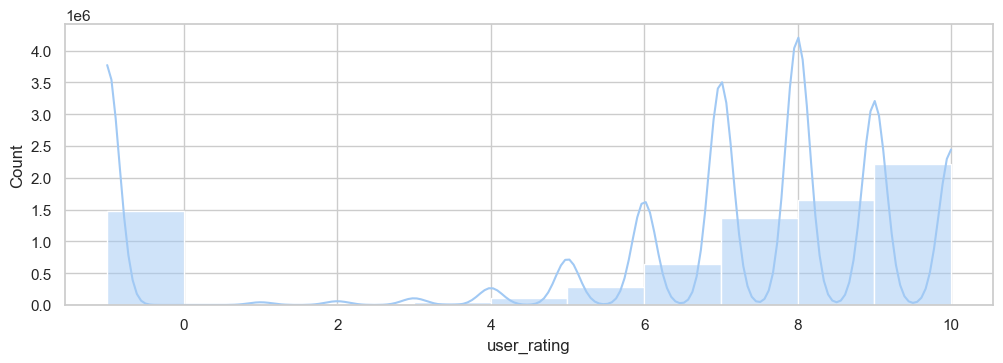

In [116]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(rating_merged_df, x='user_rating', kde=True, binwidth=1, binrange=[-1, 10], ax=axs)

rating_merged_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))


### 2. Compare **Anime Dataframe** vs **Rating Merged Dataframe**

In [117]:
rating_merged_droped_unrated_user_df = rating_merged_df.drop(rating_merged_df[rating_merged_df['user_rating'] < 0].index)

compare_anime_vs_rating_merged_df = rating_merged_droped_unrated_user_df.groupby(['anime_id']).agg({
    'members': 'mean',
    'user_id': 'count',
    'average_rating': 'mean',
    'user_rating': 'mean',
})
compare_anime_vs_rating_merged_df.rename(
    columns={
        'user_id': 'rating_merged: members (cal)',
        'user_rating': 'rating_merged: average_rating (cal)',
        'members': 'anime: members',
        'average_rating': 'anime: average_rating'
    },
    inplace=True)

print(f'{PRINT_COLOR_CODE.WARNING}Anime Dataframe vs Rating Merged Dataframe (droped users who have not rated anime){PRINT_COLOR_CODE.ENDC}\n')
print(f'{PRINT_COLOR_CODE.CYAN}Anime Dataframe{PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{anime_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')
print(f'{PRINT_COLOR_CODE.CYAN}Rating Merged Dataframe (droped users who have not rated anime){PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{compare_anime_vs_rating_merged_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')

compare_anime_vs_rating_merged_df


Anime Dataframe vs Rating Merged Dataframe (droped users who have not rated anime)

Anime Dataframe contains 9201 unique animes
Rating Merged Dataframe (droped users who have not rated anime) contains 8724 unique animes


,anime: members,rating_merged: members (cal),anime: average_rating,rating_merged: average_rating (cal)
anime_id,,,,
1,486824.0,13449,8.82,8.869433
5,137636.0,5790,8.40,8.439724
6,283069.0,9385,8.32,8.419393
7,64905.0,2169,7.36,7.533426
8,9848.0,308,7.06,7.198052
...,...,...,...,...
34324,817.0,11,5.40,5.909091
34325,1454.0,15,7.05,7.333333
34349,1885.0,3,7.25,7.000000


## **Data Cleansing (2)**

In Rating Merged DataFrame, replace all instances of `user_rating` with `average_rating` for rows where user_rating == -1 (unrated anime).

In [118]:
rating_merged_df['user_rating'] = rating_merged_df.apply(lambda x: x['user_rating'] if x['user_rating'] > -1 else x['average_rating'], axis=1)

rating_merged_df.reset_index(drop=True, inplace=True)
rating_merged_df


,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,7.81,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8.00,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6.00,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,7.81,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,7.81,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7809105,53492,32251,5.00,Mirai e no Kakehashi: Bridge for Future,Slice of Life,ONA,6,5.18,282
7809106,59537,33454,7.00,Kochira Katsushikaku Kameari Kouenmae Hashutsu...,"Comedy, Police, Shounen, Slice of Life",Special,1,7.77,268
7809107,63076,26123,7.00,Seitokai Yakuindomo* OVA,"Comedy, School, Shounen, Slice of Life",OVA,6,8.05,26361
7809108,65682,30450,8.00,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,1,6.17,248


## **Data Exploration (3)**

### 1. Compare **Anime Dataframe** vs **Rating Merged Dataframe**

In [119]:
# NOTE : SAME AS ABOVE, IF NO CLEANSING (2)
rating_merged_replaced_unrated_user_df = rating_merged_df.drop(rating_merged_df[rating_merged_df['user_rating'] < 0].index)

compare_anime_vs_rating_merged_df = rating_merged_replaced_unrated_user_df.groupby(['anime_id']).agg({
    'members': 'mean',
    'user_id': 'count',
    'average_rating': 'mean',
    'user_rating': 'mean',
})
compare_anime_vs_rating_merged_df.rename(
    columns={
        'user_id': 'rating_merged: members (cal)',
        'user_rating': 'rating_merged: average_rating (cal)',
        'members': 'anime: members',
        'average_rating': 'anime: average_rating'
    },
    inplace=True)

print(f'{PRINT_COLOR_CODE.WARNING}Anime Dataframe vs Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime){PRINT_COLOR_CODE.ENDC}\n')
print(f'{PRINT_COLOR_CODE.CYAN}Anime Dataframe{PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{anime_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')
print(f'{PRINT_COLOR_CODE.CYAN}Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime){PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{compare_anime_vs_rating_merged_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')

compare_anime_vs_rating_merged_df


Anime Dataframe vs Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime)

Anime Dataframe contains 9201 unique animes
Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime) contains 8818 unique animes


,anime: members,rating_merged: members (cal),anime: average_rating,rating_merged: average_rating (cal)
anime_id,,,,
1,486824.0,15509,8.82,8.862867
5,137636.0,6927,8.40,8.433203
6,283069.0,11077,8.32,8.404211
7,64905.0,2629,7.36,7.503081
8,9848.0,413,7.06,7.162954
...,...,...,...,...
34325,1454.0,20,7.05,7.262500
34349,1885.0,7,7.25,7.142857
34367,582.0,5,5.97,5.394000


---

## **Recommended System (Collaborative filtering)**

### 1. **Import Libraries**

In [120]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix


### 2. **Implmenting Core**

In [121]:
rating_merged_limit_df = rating_merged_df[rating_merged_df.user_id <= 1000]

In [122]:
user_anime_matrix = rating_merged_limit_df.pivot_table(index=['user_id'], columns=['anime_id'], values='user_rating')

user_anime_matrix

anime_id,1,5,6,7,8,15,16,17,18,19,...,33522,33524,33558,33569,33618,33659,33934,33964,34103,34240
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,8.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,8.00,NaN,NaN,6.0,NaN,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
norm_user_anime_matrix = user_anime_matrix.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

norm_user_anime_matrix.fillna(0, inplace=True)

norm_user_anime_matrix


anime_id,1,5,6,7,8,15,16,17,18,19,...,33522,33524,33558,33569,33618,33659,33934,33964,34103,34240
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.244474,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.398749,0.0,0.0,0.176526,0.0,0.176526,0.176526,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.164286,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
norm_anime_user_matrix = norm_user_anime_matrix.T

norm_anime_user_matrix

# norm_anime_user_matrix = norm_anime_user_matrix.loc[:, (norm_anime_user_matrix != 0).any(axis=0)]

user_id,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.164286,0.0,0.0,0.0
5,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
6,0.0,0.0,0.0,0.244474,0.398749,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33659,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
33934,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
33964,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [125]:
anime_user_csr = csr_matrix(norm_anime_user_matrix.values)

In [126]:
item_similarity = cosine_similarity(anime_user_csr)
item_sim_df = pd.DataFrame(item_similarity, index=norm_anime_user_matrix.index, columns=norm_anime_user_matrix.index)

item_sim_df

anime_id,1,5,6,7,8,15,16,17,18,19,...,33522,33524,33558,33569,33618,33659,33934,33964,34103,34240
anime_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.402471,0.267931,-0.069205,-0.000182,0.032537,0.021689,0.029361,0.094637,0.196407,...,0.000000,0.000000,-0.006869,-0.017317,-0.030031,-0.030031,0.000000,-0.013555,0.036283,0.024980
5,0.402471,1.000000,0.089387,-0.055125,-0.015447,0.081869,-0.011176,0.014376,0.044550,0.206288,...,0.000000,0.000000,-0.016642,0.000000,0.000000,0.000000,0.000000,0.000000,0.041477,0.013210
6,0.267931,0.089387,1.000000,0.001202,-0.026761,0.075715,-0.024489,0.047724,0.039849,0.105450,...,-0.000912,0.011123,-0.010778,-0.000032,0.000000,0.000000,-0.000912,0.000000,0.050869,0.018018
7,-0.069205,-0.055125,0.001202,1.000000,0.000000,-0.028988,0.028842,0.000000,0.000000,0.030869,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,-0.000182,-0.015447,-0.026761,0.000000,1.000000,-0.068359,0.000000,-0.095489,0.000000,-0.022550,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33659,-0.030031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.576623,1.000000,1.000000,0.000000,0.451373,0.000000,0.000000
33934,0.000000,0.000000,-0.000912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.161601,...,1.000000,0.068568,0.000000,0.035193,0.000000,0.000000,1.000000,0.000000,0.000000,-0.106452
33964,-0.013555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.260272,0.451373,0.451373,0.000000,1.000000,0.000000,0.000000


In [127]:
user_similarity = cosine_similarity(anime_user_csr.T)
user_sim_df = pd.DataFrame(user_similarity, index=norm_user_anime_matrix.index, columns=norm_user_anime_matrix.index)

user_sim_df

user_id,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.090167,0.054524,0.093145,-0.025977,0.088613,0.084997,0.088255,0.0,-0.009887,...,-0.054411,0.002564,0.172830,-0.108390,0.052606,0.159161,-0.176179,-0.035487,-0.004854,0.031783
2,0.090167,1.000000,0.126274,0.000000,0.014420,0.000000,0.000000,0.000000,0.0,0.000000,...,-0.003667,0.000000,0.000000,0.000000,0.029739,0.106463,0.031287,0.000000,0.000000,0.000000
3,0.054524,0.126274,1.000000,0.129345,0.059890,0.062070,0.173318,0.021199,0.0,0.067020,...,-0.099122,0.019432,0.031545,0.075540,0.120025,0.109448,0.024772,0.047520,0.075005,0.052970
4,0.093145,0.000000,0.129345,1.000000,0.101688,0.110560,0.091156,0.070990,0.0,-0.038500,...,-0.051143,-0.000369,0.020451,0.022894,0.031810,0.042790,-0.044343,0.049697,0.144857,0.035327
5,-0.025977,0.014420,0.059890,0.101688,1.000000,-0.003094,0.067183,0.012382,0.0,-0.005998,...,0.017239,0.051654,0.038090,-0.005136,0.089837,0.021235,0.067205,0.036925,0.004459,-0.005696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.159161,0.106463,0.109448,0.042790,0.021235,0.065655,0.092356,0.048562,0.0,0.020290,...,0.004333,0.012478,0.126078,0.047366,0.021244,1.000000,0.070475,0.005344,-0.001638,0.028346
997,-0.176179,0.031287,0.024772,-0.044343,0.067205,0.040331,0.091127,-0.023330,0.0,0.134793,...,0.234653,0.035022,0.059786,0.149040,0.082866,0.070475,1.000000,0.000000,0.114251,0.058641
998,-0.035487,0.000000,0.047520,0.049697,0.036925,0.009708,0.000000,-0.028708,0.0,0.000000,...,0.000000,0.009786,-0.019155,-0.023583,0.070271,0.005344,0.000000,1.000000,-0.020866,-0.038199


In [128]:
def get_anime_watched_by_user_df(user_id):

    return rating_merged_df[rating_merged_df['user_id'] == user_id]


In [129]:
def get_rating(user_id, anime_id):
    anime_watched_df = get_anime_watched_by_user_df(user_id)

    try:
        return anime_watched_df[anime_watched_df['anime_id']==anime_id]['user_rating'][0]
    except:
        return 0

In [130]:
def get_watched_rating_mean_by_user(user_anime_watched_df):
    
    return user_anime_watched_df['user_rating'].sum() / len(user_anime_watched_df)


In [180]:
def pred_ranking_score(user_id, anime_id):
    user_sim_top_10 = user_sim_df.sort_values(
        by=user_id, ascending=False)[user_id][1:2]

    user_sim_top_10_df = pd.DataFrame({
        'user_id': user_sim_top_10.index,
        'sim': user_sim_top_10.values,
    })
    user_sim_top_10_df['magic_value'] = user_sim_top_10_df.apply(
        lambda x: x['sim'] * get_rating(x['user_id'], anime_id) - get_watched_rating_mean_by_user(get_anime_watched_by_user_df(x['user_id'])), 
    axis=1)

    # sum_sim_users = sim_users['sim'].sum()

    # sum_mean_users = 0
    # for idx, row in sim_users.iterrows():
    #     mean_user = get_watched_rating_mean_by_user(row['user_id'])
    #     sum_mean_users += row['sim'] * (get_rating_by_user_anime(row['user_id'], anime_name) - mean_user)

    # user_anime_watched_df = get_anime_watched_by_user_df(user_id)

    # rating_mean = get_watched_rating_mean_by_user(user_anime_watched_df)

    # return rating_mean + (user_sim_top_10_df['magic_value'].sum()/user_sim_top_10_df['sim'].sum())

    return 1


In [181]:
def suggest_by_user_based(user_id):
    anime_score_df = pd.DataFrame({'anime_id': user_anime_matrix.columns.values})

    
    anime_score_df['ranking_score'] = anime_score_df.apply(lambda x: pred_ranking_score(user_id, x['anime_id']), axis=1)
    return anime_score_df.sort_values(by=['ranking_score'], ascending=False)


In [182]:
cb_suggestion_df = suggest_by_user_based(3)

cb_suggestion_df.head(10)

/var/folders/j0/tshgp2c155g7dhqg2_j7sxr00000gn/T/ipykernel_87361/3701901777.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  user_sim_top_10 = user_sim_df.sort_values(
/var/folders/j0/tshgp2c155g7dhqg2_j7sxr00000gn/T/ipykernel_87361/3701901777.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  user_sim_top_10 = user_sim_df.sort_values(
/var/folders/j0/tshgp2c155g7dhqg2_j7sxr00000gn/T/ipykernel_87361/3701901777.py:2: FutureWarning: The behavior of `series[i:j]` with an integer

KeyboardInterrupt: 

In [ ]:
cb_suggestion_df.head(10)

,name,score
922,Highschool of the Dead,6.569804
2147,Shingeki no Kyojin,4.779017
2293,Sword Art Online,3.983675
533,Dragon Ball,3.244046
534,Dragon Ball GT,3.244046
1658,Nanatsu no Taizai,3.000594
1551,Mirai Nikki (TV),2.983213
916,High School DxD,2.946364
627,Fullmetal Alchemist,2.902019
473,Death Note,2.875395


### 5. **Evaluation**

# Top-K

In [ ]:
def top_k_precision(user_id, k=10):
    return len(set.intersection(
        *[set(recomend_anime['name'].head(k)), set(merged_df[merged_df['user_id']==user_id]["name"])]))/float(k)

In [ ]:
top_k_precision(user_id)

NameError: name 'user_id' is not defined

# Auc

In [ ]:
def auc_precision(user_id):  
    cb_anime_actual_interect_df = recomend_anime[recomend_anime["name"].isin(merged_df[merged_df['user_id']==user_id]['name'])].copy()
    cb_anime_not_interect_df = recomend_anime[~recomend_anime["name"].isin(merged_df[merged_df['user_id']==user_id]['name'])].copy()
    
    auc_score = 0
    
    n = len(cb_anime_actual_interect_df) * len(cb_anime_not_interect_df)
    
    cb_anime_actual_interect_df['n_prime'] = cb_anime_actual_interect_df.apply(
        lambda x: len(cb_anime_not_interect_df[x['score'] > cb_anime_not_interect_df['score']]), axis=1)
    cb_anime_actual_interect_df['n_prime_2'] = cb_anime_actual_interect_df.apply(
        lambda x: len(cb_anime_not_interect_df[x['score'] == cb_anime_not_interect_df['score']]), axis=1)

    n_prime = cb_anime_actual_interect_df['n_prime'].sum()
    n_prime_2 = cb_anime_actual_interect_df['n_prime_2'].sum()

    auc_score = (n_prime + (0.5 * n_prime_2)) / n
    print(
        f'auc_score : {auc_score:.4f} (n = {n}, n\' = {n_prime} , n\" = {n_prime_2}) (actual_interect : {len(cb_anime_actual_interect_df)}, not_interect : {len(cb_anime_not_interect_df)})'
    )

In [ ]:
auc_precision(user_id)

auc_score : 0.8605 (n = 774475, n' = 637609 , n" = 57579) (actual_interect : 325, not_interect : 2383)
